In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno



##### Load the dataset

In [12]:
train_df = pd.read_csv("C:/dataset/train (1).csv", index_col="PassengerId")
test_df  = pd.read_csv("C:/dataset/test (1).csv",  index_col="PassengerId")

In [14]:
data = pd.concat([train_df, test_df], axis=0)

In [15]:
num_cols=['Transported', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop("Transported", axis=1), data["Transported"], test_size=0.2, random_state=42)

In [18]:
data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN


In [19]:
train_df[num_cols].corr()

,Transported,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,1.000000,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075
Age,-0.075026,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007
RoomService,-0.244611,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581
FoodCourt,0.046566,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995
ShoppingMall,0.010141,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322
Spa,-0.221131,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821
VRDeck,-0.207075,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000


<AxesSubplot:>

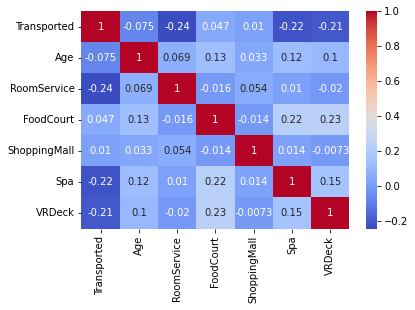

In [20]:
sns.heatmap(data=train_df[num_cols].corr(), annot=True, cmap='coolwarm')

In [21]:
data.groupby(by='VIP').count()

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
VIP,,,,,,,,,,,,
False,12122,12106,12120,12137,12142,12149,12123,12107,12125,12142,12115,8291
True,267,267,266,270,271,269,267,266,269,266,268,199


In [22]:
data.groupby(by='Age').count()

,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
Age,,,,,,,,,,,,
0.0,257,256,255,254,254,255,257,251,255,251,250,178
1.0,92,91,91,93,94,91,93,91,89,93,93,67
2.0,107,104,105,109,109,104,109,106,109,107,103,75
3.0,107,106,108,109,103,107,105,107,106,109,107,75
4.0,90,88,90,89,90,90,84,91,89,89,90,71
...,...,...,...,...,...,...,...,...,...,...,...,...
75.0,6,6,5,6,6,6,6,6,5,6,6,4
76.0,2,2,2,2,2,2,2,2,2,2,2,2
77.0,3,3,3,3,3,3,2,3,3,3,3,2


In [27]:
data[data['Age']<20].count()

HomePlanet      3147
CryoSleep       3134
Cabin           3137
Destination     3144
Age             3215
VIP             3141
RoomService     3142
FoodCourt       3156
ShoppingMall    3144
Spa             3148
VRDeck          3139
Name            3133
Transported     2158
dtype: int64


Attempting to ascertain whether the infants are in cryo sleep, but that statement is not accurate.

In [26]:
data.sort_values(by=['Age'], inplace=False, ascending=True).T

PassengerId,9275_01,8944_01,0384_01,7348_02,7354_02,3301_03,1491_03,1500_06,6662_01,6662_03,...,8534_03,8748_02,8768_03,8877_01,9016_05,9065_01,9147_01,9177_02,9271_01,9273_01
HomePlanet,Europa,Earth,Earth,Mars,Europa,Earth,Earth,Earth,Earth,Earth,...,Earth,Mars,Earth,Europa,Europa,Mars,Earth,Europa,Mars,Europa
CryoSleep,False,True,False,True,False,False,False,True,False,True,...,True,False,False,True,False,True,True,True,True,False
Cabin,A/97/P,G/1442/S,G/56/S,F/1414/S,B/242/P,G/525/S,G/240/P,G/230/S,G/1087/S,G/1087/S,...,G/1371/S,F/1803/P,F/1699/S,C/292/P,B/345/S,F/1755/S,G/1490/P,C/306/P,D/296/P,D/297/P
Destination,TRAPPIST-1e,PSO J318.5-22,55 Cancri e,55 Cancri e,TRAPPIST-1e,55 Cancri e,TRAPPIST-1e,TRAPPIST-1e,TRAPPIST-1e,55 Cancri e,...,TRAPPIST-1e,TRAPPIST-1e,TRAPPIST-1e,TRAPPIST-1e,55 Cancri e,TRAPPIST-1e,TRAPPIST-1e,55 Cancri e,55 Cancri e,NaN
Age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIP,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
RoomService,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,945.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FoodCourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2918.0,0.0,0.0,0.0,0.0,2680.0
ShoppingMall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,145.0,0.0,3196.0,0.0,0.0,0.0,0.0,0.0


In [28]:
data.isnull().any(axis=0)

HomePlanet      True
CryoSleep       True
Cabin           True
Destination     True
Age             True
VIP             True
RoomService     True
FoodCourt       True
ShoppingMall    True
Spa             True
VRDeck          True
Name            True
Transported     True
dtype: bool

<AxesSubplot:>

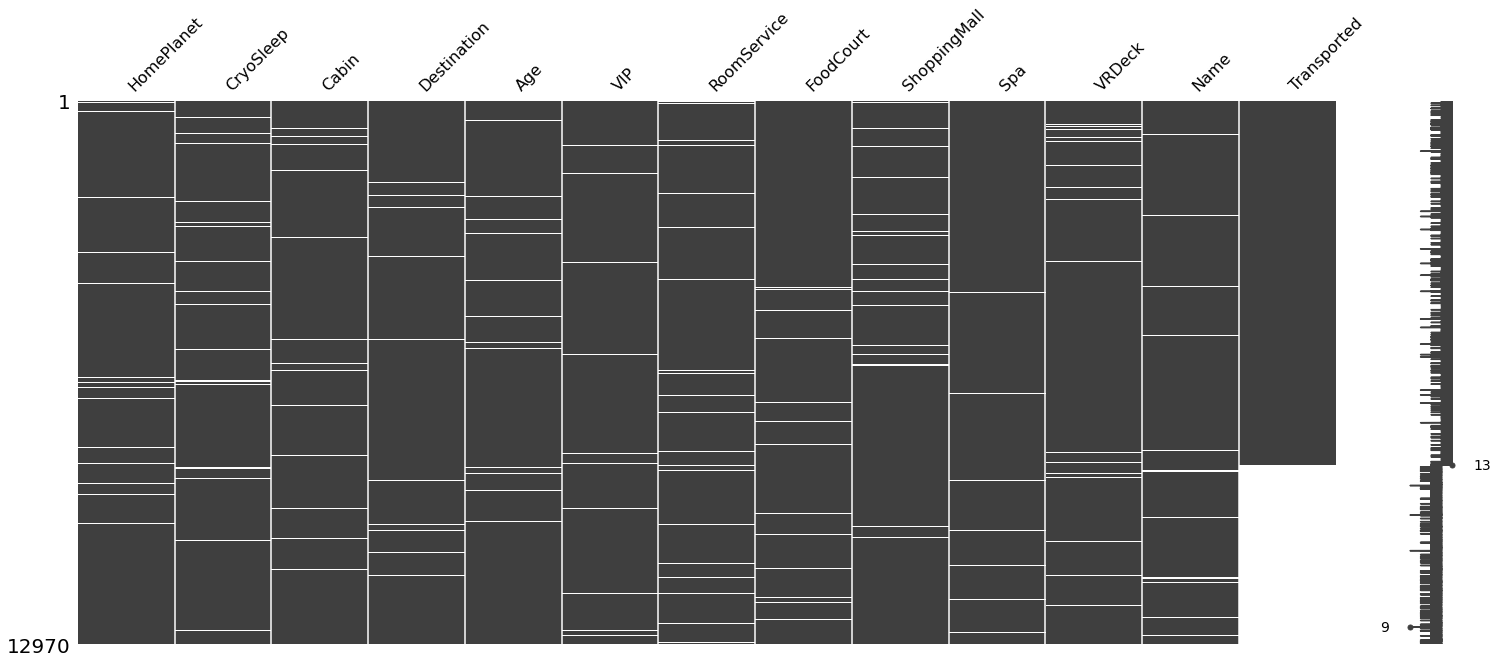

In [29]:
missingno.matrix(data)

In [30]:
data['VIP'].fillna('False', inplace=True)
data['VIP'].fillna('False', inplace=True)
data['RoomService'].fillna(0, inplace=True)
data['Spa'].fillna(0, inplace=True)
data['ShoppingMall'].fillna(0, inplace=True)
data['VRDeck'].fillna(0, inplace=True)
data['FoodCourt'].fillna(0, inplace=True)
data['HomePlanet'].isna().any()
data['HomePlanet'].isna().any()

True

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
data_std = data.copy()

In [33]:
scaler = StandardScaler()
data_std[num_cols] = scaler.fit_transform(data[num_cols])

In [34]:
data_std[num_cols].describe()

,Transported,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8.693000e+03,1.270000e+04,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04
mean,1.767826e-16,1.210493e-16,-8.491451e-17,-3.976088e-17,-9.336573e-16,-6.103145e-16,7.090105e-16
std,1.000058e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.007274e+00,-1.999901e+00,-3.402897e-01,-2.818222e-01,-2.923650e-01,-2.697071e-01,-2.571004e-01
25%,-1.007274e+00,-6.792365e-01,-3.402897e-01,-2.818222e-01,-2.923650e-01,-2.697071e-01,-2.571004e-01
50%,9.927789e-01,-1.231672e-01,-3.402897e-01,-2.818222e-01,-2.923650e-01,-2.697071e-01,-2.571004e-01
75%,9.927789e-01,6.414282e-01,-2.736741e-01,-2.418025e-01,-2.529903e-01,-2.250125e-01,-2.262946e-01
max,9.927789e-01,3.491284e+00,2.198490e+01,1.873184e+01,3.992463e+01,1.976062e+01,2.039392e+01


In [36]:
train = data_std[0:len(train_df)]
X_test  = data_std[len(train_df):]

In [37]:
X_test = X_test.drop('Transported', axis=1)

In [38]:
#from sklearn.model_selection import train_test_split
y = train['Transported'] # Labels
X = train.drop('Transported', axis=1) # Features

In [39]:
y=y.astype(int)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create an SVC object and specify the desired parameters
model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
